# Tutorial on optimization of *smooth* phenomena for computational and data science 
---


## Want to use Colab? [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/CDHE-OER-Presentations/blob/master/Tutorials/Optimizing_with_Python_and_Jupyter_Tutorial.ipynb)

---

---


***Disclaimer:*** 

- These tutorials are meant to convey high-level concepts and also show some advanced programming techniques and tricks. While some details are included for the sake of completeness or provide additional references for the interested reader, they are generally not required in order to follow the logical progression of ideas. 

- Moreover, you are not expected to know or understand all the details in great depth. In many cases, we specifically link details to specific courses so that you can plan your schedule around what you are most interested in learning.  

***Level of assumed pre-requisite knowledge:*** 

- A "pre-calculus" level of mathematical proficiency is assumed that covers some [geometry formulas for areas/volumes of common shapes](https://en.wikipedia.org/wiki/List_of_formulas_in_elementary_geometry), [college algebra](https://en.wikipedia.org/wiki/Elementary_algebra), and also some familiarity with [common trigonometric functions](https://en.wikipedia.org/wiki/Trigonometric_functions). 

- Basic statistics revolving around the concept of a [line of best fit](https://en.wikipedia.org/wiki/Simple_linear_regression), i.e., fitting a line through data.

- Introductory-level programming knowledge (in any language) involving variable types, user-defined functions, if-else statements, and for-loops. 

---

---

What ***is*** [optimization](https://en.wikipedia.org/wiki/Mathematical_optimization)? 

From Wikipedia:

> ... optimization ... is the selection of a **best element**, with regard to some criterion, **from some set of available alternatives**... Optimization problems ... arise in **all quantitative disciplines** from computer science and engineering to operations research and economics, and the development of solution methods has been of interest in mathematics for centuries.

---

---

## <center> <mark>**Where do questions of optimization naturally arise?**</mark> </center>



| $\Large\text{Rigid Body Dynamics}$ | $\Large\text{Options pricing for stocks and commodities}$ |
| :---: | :---: |
| <img src="https://upload.wikimedia.org/wikipedia/commons/e/e3/Demonstrating_Chaos_with_a_Double_Pendulum.gif" /> | <img src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Black-Scholes_Put.gif"/> |
| $\Large\text{Transportation engineering}$  | $\Large\text{Electrical engineering}$ |
| <img src="https://upload.wikimedia.org/wikipedia/en/9/91/Ont_fdr_12_5_ex2.gif" /> | <img src="https://upload.wikimedia.org/wikipedia/commons/b/b2/Dipole_receiving_antenna_animation_4_616x380x150ms.gif" /> |
| $\Large\text{Computational epidemiology}$  | $\Large\text{Control engineering}$ |
| <img src="https://upload.wikimedia.org/wikipedia/commons/2/20/SIR_model_anim.gif" /> | <img src="https://upload.wikimedia.org/wikipedia/commons/1/16/Closed_circuit_ventilators.gif" /> |
| $\Large\text{Machine learning}$  | $\Large\text{Atmospheric science}$ |
| <img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Perceptron_training_without_bias.gif" /> | <img src="https://upload.wikimedia.org/wikipedia/commons/5/5c/Daily_mean_precipitation.gif" /> |




## Our Motivating Example: Product Design (a.k.a. how to minimize cost to maximize profits)
---

Imagine you just discovered that you are the world's best pasta sauce maker.
You should profit on this discovery!

People love your sauce so much that they want to buy it a ***liter*** at a time.
A liter is 1000 cm<sup>3</sup>. 
That is a lot of sauce!
You can almost taste the profits.

There is only one problem, you need to find liter sized glass containers for your sauce.

<img src="https://www.publicdomainpictures.net/pictures/230000/velka/jars-of-homemade-spaghetti-sauce.jpg" width=50%/>

You talk with your [copacker](https://en.wikipedia.org/wiki/Contract_packager#:~:text=A%20contract%20packager%2C%20or%20copacker,household%20products%2C%20and%20industrial%20products.), and they cannot find a distributor of glass containers that makes the quality and quantity of liter sized containers you need.
But, your copacker has a suggestion: we can design and make our own containers!
This is a great idea!

Your objective is to design a liter sized glass container that minimizes the cost of production, and thus, maximizes your profits!

Sounds easy enough...how do we do this? *Hint: optimization.*


## Setting the stage with a brief discussion on *roots* and their role in optimizing *smooth* phenomena
---

<mark>***Root-problems naturally arise in optimization of smooth phenomena.***</mark>

That one sentence contains a few terms that may seem rather mysterious. Below, we ask and answer a sequence of questions to help clarify terminology while simultaneously revealing the fundamental role that root-problems play in the optimization of smooth phenomena.


<br>

---
# <center> ✋ What does "smooth" mean❓</center>
---

<br>

Conceptually, a smooth function is one that is both continuous (its graph does not contain any holes, jumps, vertical asymptotes, etc.) and does not contain "abrupt changes" like corners and elbows.

We show plots of several smooth functions below as well as non-smooth functions. This also provides us an opportunity to play with [`numpy`](https://numpy.org/doc/stable/index.html) and [`matplotlib`](https://matplotlib.org/) while also seeing how to create user-defined functions while using basic logic and for-loops.



---
### $\large 🤔$ How do we import and use libraries, sub-libraries, and modules?
---

- The code 

  `import name_of_library as library_nickname` 

  imports a particular library (or sub-library/module) and assigns it a "nickname" that you are free to choose. We often use `np` for `numpy` and `plt` for the plotting module within `matplotlib`.

- We then make use of functions/methods and built-in library constants using the "dot" convention. 

  For instance, `np.pi` gives us an approximation to the mathematical constant $\pi$ whereas `np.sin` gives us access to a trigonometric sine function within the `numpy` library. 

- Want to learn more? See [this lecture notebook](https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/02-Python-Basics/lectures/02_lecture_part_b.ipynb) from the MATH 1376 Programming for Data Science course.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

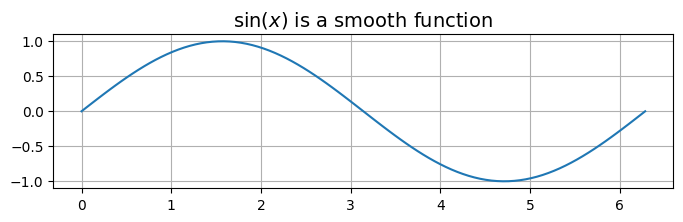

In [38]:
# Numpy has lots of familiar mathematical functions that are optimized to be
# evaluated on arrays of data, routines for making specific types of arrays of
# data and also many familiar mathematical constants

x = np.linspace(0, 2*np.pi, 100)  # Make an array of 100 x values from 0 to 2\pi 
plt.figure(figsize=(8,2))
plt.plot(x, np.sin(x))
plt.title('$\sin(x)$ is a smooth function', fontsize=14)
plt.grid()

For more information on 

- mathematical functions contained within `numpy`, refer here: https://numpy.org/doc/stable/reference/routines.math.html;

- constants contained within `numpy`, refer here: https://numpy.org/doc/stable/reference/constants.html;

- array creation routines within `numpy`, refer here: https://numpy.org/doc/stable/reference/routines.array-creation.html.

For a quick start guide to `matplotlib`, refer here: https://matplotlib.org/stable/tutorials/introductory/quick_start.html.

---
### $\large 🤔$ What is the syntax for a user-defined function?
---

- In Python, the syntax for a function is as follows

  ```
  def function_name(parameters):
      # Do cool stuff
      return  # return something?
  ```

- Want to learn more about functions, docstrings, defaulting values for parameters, pass-by-reference vs. pass-by-value, etc.? Check out [this lecture notebook](https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/03-Functions-Loops-Modules/lectures/03_lecture_part_a.ipynb) from the MATH 1376 Programming for Data Science course.

In [39]:
# We raise a number to a power using ** not ^
def my_polynomial(x):
    return x**3 - 4*x**2 + x - 1

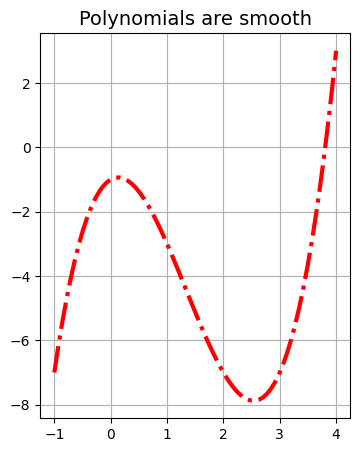

In [40]:
x = np.linspace(-1, 4, 70)  # An array of 70 points from -1 to 4
plt.figure(figsize=(4, 5)) # Define plot size
plt.plot(x, my_polynomial(x), color='r', linewidth=3, linestyle='-.') # Plot polynomial
plt.title('Polynomials are smooth', fontsize=14) # Add title with customized size
plt.grid() # Add background grid

In the two plots above, we can *see* where the local maxima and minima occur (as well as where any global maxima and minima occur) within the plotted domain, but this is not always the case. 

<mark>***We need to think critically, explore, and experiment to determine how to do this more generally.***</mark>

<br>

---
#<center> ✋ What qualitative observations can we make❓</center>
---

<br>

Notice that at an interior point where a function has a local maximum, the function changes from *increasing* to *decreasing* on either side of this point.

Similarly, at an interior point where a function has a local minimum, the function changes from *decreasing* to *increasing*. 



Text(3.0, 0, 'Function decreases\nthen increases\nas we cross\nthis point.')

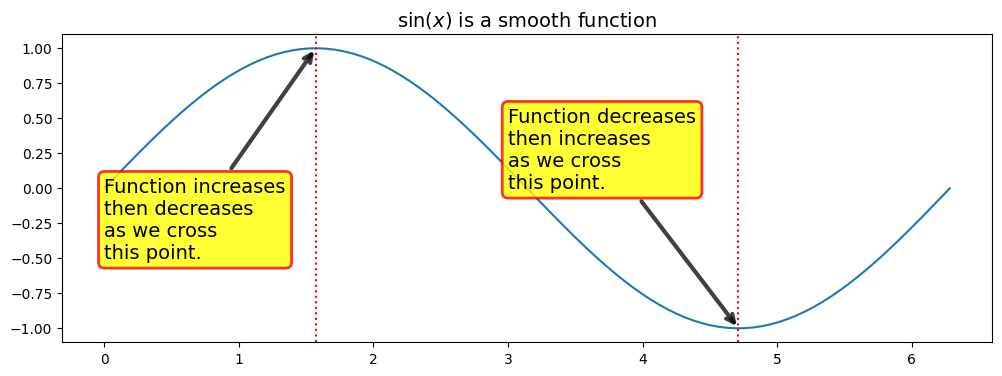

In [41]:
x = np.linspace(0, 2*np.pi, 100)  # Make an array of 100 x values from 0 to 2\pi 
plt.figure(figsize=(12,4))
plt.plot(x, np.sin(x))
plt.axvline(np.pi/2, c='r', ls=':')
plt.axvline(3*np.pi/2, c='r', ls=':')
plt.title('$\sin(x)$ is a smooth function', fontsize=14)


# Now we add fancier annotations to the plot with text and arrows in a two-step process

# First, we define the dict (dictionary) of properties of the textboxes and arrows used in the annotation
bbox = dict(boxstyle="round", fc='yellow', color='r', alpha=0.8, linewidth=2)  # properties for bounding box of text
arrowprops = dict(arrowstyle='->', color='k', alpha=0.75, linewidth=3)  # properties for the arrow

# Now annotate the plot
plt.annotate('Function increases\nthen decreases\nas we cross\nthis point.', 
             fontsize=14, xy=(np.pi/2, 1), xytext=(0,-0.5), color='k',
             bbox = bbox, arrowprops = arrowprops)

plt.annotate('Function decreases\nthen increases\nas we cross\nthis point.', 
             fontsize=14, xy=(3*np.pi/2, -1), xytext=(3.,0), color='k',
             bbox = bbox, arrowprops = arrowprops)   

<br>

---
# <center> ✋ Can we quantify what increasing and decreasing means❓</center>
---

<br>

The answer to this question is best found by asking a related, but different, question that points to a fundamental truth across all of computational and data science: <mark>***it is always a good idea to try and relate new ideas/questions to old ideas/questions where hard-earned wisdom can light the way.***</mark>




<br>

---
# <center>✋ Are there classes of functions for which it is obvious that they are increasing or decreasing❓</center>
---

<br>

<mark>***YES! LINEAR FUNCTIONS!***</mark>

Recall that if $f(x)=mx+b$ and the slope, $m$, is positive (i.e., $m>0$, then the function is increasing (i.e., the line is "tilted up") whereas if $m<0$, then the function is decreasing (i.e., the line is "tilted down").

We show this below just in case you forgot where we also make use of widgets to enhance interactivity.


---
### $\large 🤔$ What is an interactive Python widget?
---

- There are many interactive Python widgets available that help add interactivity to code. Click [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) to see a list of available widgets.

- Widgets are just a way to add "control" features to a function like sliders, check-boxes, drop-down menus, etc. that help you quickly re-run a function with new inputs without having to re-run a code cell.

- Want to learn more about widgets? Check out [this lecture notebook](https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/03-Functions-Loops-Modules/lectures/03_lecture_part_c.ipynb) from the MATH 1376 Programming for Data Science course.

In [42]:
# Usually place these at the top of a notebook if you know you are going to use widgets
# This cell only needs to be executed once
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [43]:
def plot_line(m, b):
    x = np.linspace(-1, 1, 2)
    y = m*x + b
    plt.figure(figsize=(4,4))
    plt.plot(x, y)
    title_str = '$f(x) = ' + str(m) + 'x + ' + str(b) + '$'
    plt.title(title_str)
    plt.grid();

In [44]:
interact(plot_line, 
             m = widgets.FloatSlider(value=0.1, min=-1, max=1, step=0.1),
             b = widgets.FloatSlider(value=0, min=-1, max=1)
        )

interactive(children=(FloatSlider(value=0.1, description='m', max=1.0, min=-1.0), FloatSlider(value=0.0, descr…

<function __main__.plot_line(m, b)>

<br>

---
# <center>✋ Can linear functions help us determine where nonlinear functions are increasing or decreasting❓</center>
---

<br>

If function is *smooth*, then ***we can approximate small sections of it with a linear function***. It is self-evident where the approximations are increasing or decreasing.


<br>

---
# <center>✋ How should we construct such a local linear approximation (and also make proper interpretations)❓</center>
---

<br>

We begin with a simple approximation procedure known as ***interpolation.*** 

- At each $x$ value, we could evaluate the function at both $x$ and $x+h$ for some given $h>0$ where the size of $h$ determines the ***quality*** of the local linear approximation. 

- In other words, we can just use the line connecting $(x,f(x))$ and $(x+h,f(x+h))$ as a proxy for the function $f$ between these points. This line is called a **secant line**.The **slopes** are given by the simple formula below.

<br>

$$
\large  \frac{f(x+h)-f(x)}{x+h - x} = \boxed{\frac{f(x+h)-f(x)}{h}}
$$
<br>


- As $h$ approaches zero (mathematically written as $h\to 0$), the secant line approaches what is known as a **tangent line** where the slope of this line being positive or negative tells us whether the function is increasing or decreasing at a particular point. This is illustrated in the gif below.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Derivative_GIF.gif" width=60% />
</center>

- The value of the slope of the tangent line to the curve at a particular point is often referred to as the **derivative** of the function at the particular point. Notationally, if we let $f(x)$ denote the function evaluated at $x$, then $f'(x)$ is used to denote this derivative.

<mark>***The key takeaway.***</mark>
- At any point of a *smooth* function $f(x)$, we can approximate the the derivative using our secand lines, which will give us key insights into the behavior of the function. This is illustrated in the gif below.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/81/Differentiation_of_sine.gif" width=70%/>
</center>

- Want to learn more about derivatives? Consider taking the calculus sequence of courses at CU Denver such as MATH 1401, 2411, and 2421.

Below, we visualize both the relationship between a function, the slopes of the associated secant lines, and the approximate roots of these slopes (i.e., where they are approximately equal to zero).

In [45]:
def secant_line_slope(f, x, h):
    return (f(x+h)-f(x))/h

In [46]:
def plot_linear_approx(f, xmin, xmax, h, n, show_slope_approx_roots=False):
    xs = np.linspace(xmin, xmax, n)

    fig, ax1 = plt.subplots(figsize=(8,8))
    
    # First plot the function
    ax1.plot(xs, f(xs), color='b')
    ax1.set_ylabel('f(x)', color='b', fontsize=14)

    # instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()  
    # now plot the secant line slopes
    ax2.plot(xs, secant_line_slope(f, xs, h), color='r')
    ax2.set_ylabel('Secant line slopes', color='r', fontsize=14) 

    # Let's add the x-axis to the ax2 plot so that we can see where the derivative
    # is equal to zero
    ax2.axhline(0, linewidth=2, linestyle=':', c='k');  # plot typical x-axis
    
    # Do we want to see where the slopes are approximately zero?
    if show_slope_approx_roots:
        roots = []
        delta_x = xs[1]-xs[0]
        for x in xs:
            if secant_line_slope(f, x, h) == 0:
                roots.append(x)
            elif secant_line_slope(f, x-delta_x, h) * secant_line_slope(f, x+delta_x, h) < 0:
                roots.append(x)
        for root in roots:
            ax2.axvline(root, linewidth=1, linestyle=':', c='r')

In [47]:
interact_manual(plot_linear_approx,
                    f = fixed(lambda x: np.sin(x)),  # We use a lambda function here
                    xmin = fixed(0),
                    xmax = fixed(2*np.pi),
                    h = widgets.FloatLogSlider(value=0.01, min=-16, max=-2, base=10, step=1),
                    n = widgets.IntSlider(value=100, min=50, max=1000, step=50),
                    show_slope_approx_roots = widgets.Checkbox(value=False,
                                                       description='Show approx. roots of slopes?')

               );

interactive(children=(FloatLogSlider(value=0.01, description='h', max=-2.0, min=-16.0, step=1.0), IntSlider(va…

In [48]:
interact_manual(plot_linear_approx,
                    f = fixed(my_polynomial),  # We use a lambda function here
                    xmin = fixed(0),
                    xmax = fixed(2),
                    h = widgets.FloatLogSlider(value=0.01, min=-16, max=-2, base=10, step=1),
                    n = widgets.IntSlider(value=100, min=50, max=1000, step=50),
                    show_slope_approx_roots = widgets.Checkbox(value=False,
                                                       description='Show approx. roots of slopes?')

               );

interactive(children=(FloatLogSlider(value=0.01, description='h', max=-2.0, min=-16.0, step=1.0), IntSlider(va…

---
# <center> Putting it all together </center>
---

<br>

---
# <center>✋ What is the mathematically precise definition of smoothness❓</center>
---

<br>

Mathematically, it means the function has as many *derivatives* as we require. 

<br>

---
# <center>✋ What are some conceptual interpretations of derivatives❓</center>
---

<br>

While derivatives are a concept from calculus used to measure the instantaneous rate of change of a function, it is often useful to think of it in very physical terms: the derivative of position as a function of time is velocity, the derivative of velocity as a function of time is acceleration, etc. 

Is there a physically meaningful derivative of acceleration? Yes! It is called the *jerk*, and I do not mean in the context "This lying jerk said we didn't need to know calculus to get through this tutorial!". 

<br>

---
# <center>✋ Why do we care about derivatives again❓</center>
---

<br>

Briefly put: *optimization*. <mark>***Where a derivative is equal to zero corresponds to what is called a critical point of the function.***</mark> 

In other words, the *roots* of a derivative are *critical points* of the original function. 

<br>

---
# <center> ✋ What is so important about critical points❓</center>
---

<br>

These are the potential locations of maxima and minima of a function. These points are of great interest in many computational and data science problems.

<br>

---
# <center>✋ Do we need to actually know how to find the exact derivatives of a given function❓</center>
---

<br>

No! We can use code to produce numerical estimates of derivatives that we either write or are available for us to use in various optimization codes. 

But, if you want to learn more about the details of derivatives, then you should consider taking some calculus courses starting with MATH 1401 Calculus I. If you want to learn more about the impact of numerical approximations of derivatives and other mathematical objects on various algorithms, then consider taking MATH 4650/5660 Numerical Analysis I. 

<br>

---
# <center>✋ Do all functions have derivatives❓</center>
---

<br>

Not all functions have derivatives. *Most* continuous functions you are familiar with are smooth, which makes one wonder...when is a function not smooth? $\huge 🤔$

<br>

---

<br>

The simplest example of a continuous function that is not differential everywhere is a "piecewise" linear function. It is differentiable everywhere except where the linear functions are joined (and maybe at the endpoints). 

We define a continuous, but non-smooth, piecewise linear function called a tent function below.<br>

$$
\large f(x) = \begin{cases}
            x+1, & -1<x<0, \\
            1-x, & 0\leq x<1, \\
            0, & \text{else}.
           \end{cases}
$$

---
### $\large 🤔$ How do we code conditional statements?
---

- We use the `if-elif-else` structure as shown below where `elif` stands for "else if". 

  ```
  if (some condition is True):
      do some stuff
  elif (some other condition is True):
      do some other stuff
  else:  # notice there is no condition here
      do something else entirely
  ```

- An "if" or "else if" statement has a condition attached that is checked. If it is `True`, then the *indented* code below that "if" or "else if" statement is executed and *no other code* within the `if-elif-else` structure is executed upon the first `True` condition being encountered.

- An `elif` is entirely optional. We only use it if necessary. We can also have an aribtrary number of these meaning we can have 0, 1, 2, ... such parts of an `if-elif-else` structure.

- If no "if" or "else if" conditions are `True`, then the indented code following the `else:` statement will run (note there is no condition after the `else`). 

- However, the `else:` part is also optional. If there is no `else:` part so that we have an `if-elif` structure, then the code just continues as if nothing happened. 

- Finally, conditions can be made multi-faceted by joining several conditions together through the use of `and`/`or` statements.

- Want to learn more about logic and conditionals? Check out [this lecture notebook](https://github.com/CU-Denver-MathStats-OER/Programming-for-Data-Science/blob/main/Lectures-and-Assignments/03-Functions-Loops-Modules/lectures/03_lecture_part_a.ipynb) from the MATH 1376 Programming for Data Science course.

In [51]:
def tent(x):
    if (-1 < x) and (x < 0):
        return x+1
    elif (0 <= x) and (x < 1):
        return 1-x
    else:
        return 0

The `tent` function above can be evaluated on scalar inputs (specific $x\in\mathbb{R}$). <mark>Unfortunately, we cannot evaluate it on `numpy` arrays as we show below. </mark>

In [52]:
# We canNOT evaluate the function above on numpy arrays!
# Why not? The answer lies within the inequalities...

x = np.linspace(-2, 2, 101)
y = tent(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Below, we show a workaround that can serve as a simple template for turning any function into one that can handle arrays of inputs.

In [53]:
# Let's define a tent function that can handle arrays
def tent4array(xs):
    n = len(xs)  # obtain the length of the xs array
    ys = np.zeros(n)  # Make an array of zeros that is the same length as the array of x values
    # Now loop over each of the components in the xs array
    for i in range(n):
        ys[i] = tent(xs[i])
    
    return ys

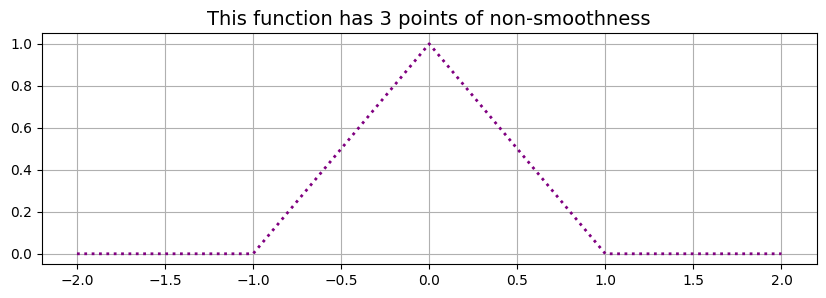

In [54]:
plt.figure(figsize=(10,3))
x = np.linspace(-2, 2, 201)
plt.plot(x, tent4array(x), color='purple', linewidth=2, linestyle=':')
plt.title('This function has 3 points of non-smoothness', fontsize=14)
plt.grid()

## Back to our quest for world domination in the cutthroat world of pasta sauce
---

Let's address some obvious constraints. 

- ***This is a glass container! It can NOT have edges or corners!***


- The shape required is a [right-circular cylinder](https://en.wikipedia.org/wiki/Cylinder) (we will ignore the slight curvature that you always see near the bottom/top of the container for simplicity) with a solid glass bottom (otherwise the sauce will not stay in the container) and an open top (where the sauce is poured into the container during production before a lid is screwed on to secure the contents). 

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3f/Cylinder.svg" width=20% />
</center>

- This means that you have to determine the radius $r$ (equal to half the diameter $d$) of the circular base and the height $h$ of the container. 

- Assume that the thickness of the glass is the same for all shapes of containers so that the cost of the commercial-grade raw materials used to make any glass container can be expressed in terms of the surface area of the cylinder. 
Your objective is then clear: design a 1000 cm<sup>3</sup> container with minimal surface area.


## The mathematics of the cost of making the jars
---

The surface area of a container you specify with base radius $r$ and height $h$ is given by

$$
 \large   S = \underbrace{\pi r^2}_{\text{Base}} + \underbrace{2\pi r h}_{\text{Side}},
$$

while the volume is given by

$$
   \large V = \pi r^2 h.
$$

Since the volume needs to be 1000 cm<sup>3</sup>, the (constrained) optimization problem is summarized as

$$
\large    \begin{array}{c} 
        \text{minimize  } S=\pi r^2 + 2\pi rh \\
        \text{subject to  } 1000 = \pi r^2h.
    \end{array}
$$

Using the constraint, we have that $\large h=\frac{1000}{\pi r^2}$, so we can substitute this into the surface area equation to simplify this problem to the following
$$
\large \text{minimize } S=\pi r^2 + \frac{2000}{r}.
$$

The only "obvious" constraint now is that $r>0$ (the circular base has to have a positive radius). Otherwise, all positive values of $r$ are now "fair game" in the optimal design of the container. 

Once $r$ is determined, we can use $\large h=\frac{1000}{\pi r^2}$ to determine $h$.

In [55]:
def surfArea(r):

    if np.any(r <= 0):
        raise ValueError('The circular base requires r>0')
    
    S = np.pi*r**2 + 2000/r 
    
    return S

Text(0.5, 0, 'Radius [cm] of base')

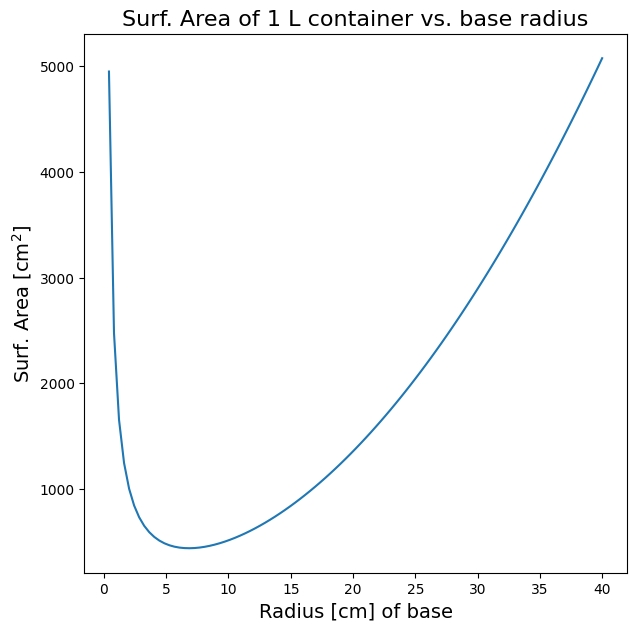

In [56]:
r = np.linspace(0, 40, 100)

plt.figure(figsize=(7,7))
plt.plot(r[1:], surfArea(r[1:]))  # Note that we do NOT use r[0] in the plotting
plt.title('Surf. Area of 1 L container vs. base radius', fontsize=16)
plt.ylabel('Surf. Area [cm$^2$]', fontsize=14)
plt.xlabel('Radius [cm] of base', fontsize=14)

To find the precise radius where surface area is minimized, we turn to the optimization subpackage of `scipy`.

Let's take a few short minutes just to peruse the documentation where we will see references to root finding, derivative approximations, and a bevy of methods useful for optimization: https://docs.scipy.org/doc/scipy/reference/optimize.html

In [57]:
from IPython.display import IFrame
IFrame("https://docs.scipy.org/doc/scipy/reference/optimize.html", 900,500)

In [58]:
import scipy.optimize as opt

In [59]:
optimal_jar_info = opt.minimize(surfArea, x0=5)
print(optimal_jar_info)

      fun: 439.37756626845703
 hess_inv: array([[0.0530374]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([6.82784057])


In [60]:
r_opt = optimal_jar_info.x
print(r_opt)

[6.82784057]


We visualize the optimal radius value along with the derivative (using [`scipy.optimize.approx_fprime`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.approx_fprime.html#scipy.optimize.approx_fprime)) below.

The annoying thing about the `approx_fprime` function is that it can only approximate the derivative at a single point. Luckily for us, the `tent` function example above showed us how to turn any function into one that can handle arrays of inputs, which is very useful for plotting purposes. 

In [61]:
def approx_deriv_4_arrays(f, xs):
    n = len(xs)  # obtain the length of the xs array
    ys = np.zeros(n)  # Make an array of zeros that is the same length as the array of x values
    # Now loop over each of the components in the xs array
    for i in range(n):
        ys[i] = opt.approx_fprime(xs[i], f, epsilon=1e-7)
    
    return ys

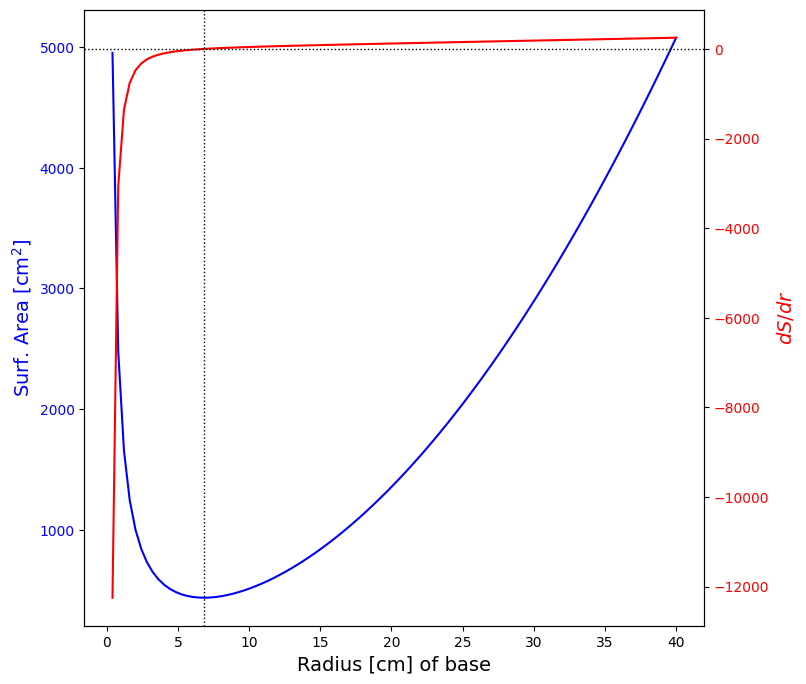

In [62]:
fig, ax1 = plt.subplots(figsize=(8,8))

ax1.set_xlabel('Radius [cm] of base', fontsize=14)
ax1.set_ylabel('Surf. Area [cm$^2$]', color='b', fontsize=14)

ax1.plot(r[1:], surfArea(r[1:]), color='b')
ax1.tick_params(axis='y', labelcolor='b')

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# we already handled the x-label with ax1 so we should just label the new y-axis
ax2.set_ylabel('$dS/dr$', color='r', fontsize=14) 

ax2.plot(r[1:],approx_deriv_4_arrays(surfArea, r[1:]), color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.axhline(0, linewidth=1, linestyle=':', c='k')  # plot typical x-axis
ax2.axvline(r_opt, linewidth=1, linestyle=':', c='k');

## We forgot the lid! How did we forget the lid?!
---

So, yeah, we kind of forget to account for the cost of the lid in the container. Oops!

Suppose that the cost of the materials for making the glass part of the container is given as $.001\text{ cm}^2$ for the thickness of glass we need. In other words, it costs one-tenth of one penny per square centimeter of glass needed at the desired thickness. 

Suppose the cost of the materials for making an aluminum lid is given in terms of $.003\text{ cm}^2$ at the desired thickness of the lid, in other words, it costs three-tenths of one penny per square centimeter of aluminum needed.

The *total cost* (in USD) to produce a single 1 L container (with lid) is given by

$$
   \large C = 0.001\left(\pi r^2 + \frac{2000}{r}\right) + 0.003 \pi r^2.
$$

This is coded in the function `totalCost` below. 



In [63]:
def totalCost(r):

    if np.any(r <= 0):
        raise ValueError('The circular base requires r>0')
    
    cost_of_glass = 0.001*surfArea(r)
    cost_of_lid = 0.003*np.pi*r**2
    
    return cost_of_glass + cost_of_lid

Text(0.5, 0, 'Radius [cm] of base')

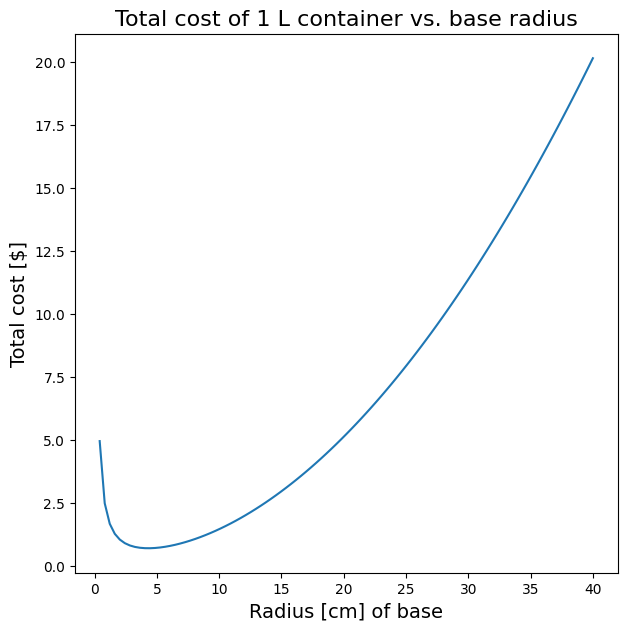

In [64]:
r = np.linspace(0, 40, 100)

plt.figure(figsize=(7,7))
plt.plot(r[1:], totalCost(r[1:]))  # Note that we do NOT use r[0] in the plotting
plt.title('Total cost of 1 L container vs. base radius', fontsize=16)
plt.ylabel('Total cost [\$]', fontsize=14)
plt.xlabel('Radius [cm] of base', fontsize=14)

In [65]:
real_optimal_jar_info = opt.minimize(totalCost, x0=5)
print(real_optimal_jar_info)

      fun: 0.6974684114348351
 hess_inv: array([[13.07083526]])
      jac: array([8.94069672e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([4.30138853])


In [66]:
real_r_opt = real_optimal_jar_info.x

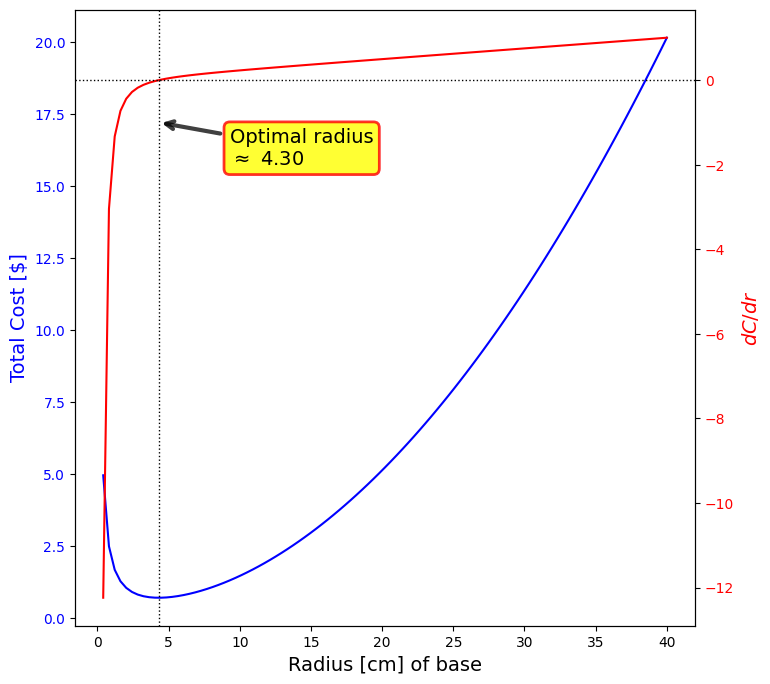

In [67]:
fig, ax1 = plt.subplots(figsize=(8,8))

ax1.set_xlabel('Radius [cm] of base', fontsize=14)
ax1.set_ylabel('Total Cost [\$]', color='b', fontsize=14)

ax1.plot(r[1:], totalCost(r[1:]), color='b')
ax1.tick_params(axis='y', labelcolor='b')

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# we already handled the x-label with ax1 so we should just label the new y-axis
ax2.set_ylabel('$dC/dr$', color='r', fontsize=14) 

ax2.plot(r[1:],approx_deriv_4_arrays(totalCost, r[1:]), color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.axhline(0, linewidth=1, linestyle=':', c='k')  # plot typical x-axis
ax2.axvline(real_r_opt, linewidth=1, linestyle=':', c='k')
ax2.annotate('Optimal radius\n' + r'$\approx$ {:.2f}'.format(real_r_opt[0]), 
             fontsize=14, xy=(real_r_opt[0], -1), xytext=(real_r_opt[0]+5,-2), 
             color='k', bbox = bbox, arrowprops = arrowprops);

A quick online search will reveal that a typical 24 oz pasta jar (equivalent to about 0.7 L) has a height of about 6.61 inches with a base diameter of about 3.37 inches. 
Recall that a diameter is just two times the radius.
  
Which of these problems is producing results that look more like a typical pasta jar in terms of the ratio of height to diameter?

In [68]:
jar_1_h = 1000/(np.pi*r_opt**2)
jar_2_h = 1000/(np.pi*real_r_opt**2)

In [69]:
# "usual" ratio of height to radius
print('Usual ratio of h to r for pasta jars: ', 6.61/(3.37/2))

Usual ratio of h to r for pasta jars:  3.9228486646884275


In [70]:
print('Minimizing glass results in ratio of h to r of: ', jar_1_h/r_opt)

Minimizing glass results in ratio of h to r of:  [1.00000003]


In [71]:
print('Minimizing total cost results in ratio of h to r of: ', jar_2_h/real_r_opt)

Minimizing total cost results in ratio of h to r of:  [3.99966952]
